<a href="https://colab.research.google.com/github/eunashin/TIL/blob/master/%EC%98%A8%EB%9D%BC%EC%9D%B8%EC%86%8C%EB%B9%84%EC%97%85%EC%A2%85_%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 데이터 불러오기

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following packages were automatically installed and are no longer required:
  libnvidia-common-460 nsight-compute-2020.2.0
Use 'sudo apt autoremove' to remove them.
0 upgraded, 0 newly installed, 0 to remove and 42 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconf

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

import seaborn as sns



In [ ]:
file_path = '/content/drive/MyDrive/Multicampus_data/시각화PJ/data/온라인쇼핑몰_판매매체별_상품군별거래액_19.01~22.04.xlsx'

In [ ]:
df = pd.read_excel(file_path, thousands=",")
df = df.T
df = df.reset_index()
df.head()

/usr/local/lib/python3.7/dist-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,index,0,1,2,3,4,5,6,7,8,...,62,63,64,65,66,67,68,69,70,71
0,상품군별,합계,NaN,NaN,컴퓨터 및 주변기기,NaN,NaN,가전·전자·통신기기,NaN,NaN,...,NaN,음식서비스,NaN,NaN,기타서비스,NaN,NaN,기타,NaN,NaN
1,판매매체별,계,인터넷쇼핑,모바일쇼핑,계,인터넷쇼핑,모바일쇼핑,계,인터넷쇼핑,모바일쇼핑,...,모바일쇼핑,계,인터넷쇼핑,모바일쇼핑,계,인터넷쇼핑,모바일쇼핑,계,인터넷쇼핑,모바일쇼핑
2,2019.01,10811796.0,3994468.0,6817328.0,561512.0,329496.0,232016.0,1063081.0,451529.0,611551.0,...,204146.0,621909.0,53351.0,568558.0,97802.0,62056.0,35746.0,223939.0,115855.0,108084.0
3,2019.02,9666871.0,3465165.0,6201706.0,542469.0,305306.0,237163.0,982059.0,403124.0,578935.0,...,207319.0,614963.0,48759.0,566204.0,77885.0,43859.0,34027.0,221598.0,117022.0,104577.0
4,2019.03,11296239.0,4207216.0,7089023.0,532496.0,313340.0,219156.0,1324884.0,568865.0,756020.0,...,223209.0,694509.0,54675.0,639833.0,78986.0,40724.0,38262.0,327742.0,205975.0,121766.0


# 데이터 정리하기

In [ ]:
# 결측값 제거, 필요없는 행 제거

df.dropna(axis=1, inplace=True)
df.drop([1], inplace=True)
df.head()

,index,0,3,6,9,12,15,18,21,24,...,42,45,48,51,54,57,60,63,66,69
0,상품군별,합계,컴퓨터 및 주변기기,가전·전자·통신기기,서적,사무·문구,의복,신발,가방,패션용품 및 액세서리,...,생활용품,자동차 및 자동차용품,가구,애완용품,여행 및 교통서비스,문화 및 레저서비스,e쿠폰서비스,음식서비스,기타서비스,기타
2,2019.01,10811796.0,561512.0,1063081.0,173949.0,79764.0,1107321.0,159646.0,202289.0,191270.0,...,831769.0,96468.0,284702.0,72818.0,1538638.0,167713.0,240122.0,621909.0,97802.0,223939.0
3,2019.02,9666871.0,542469.0,982059.0,154317.0,71208.0,959743.0,156431.0,211934.0,185262.0,...,735651.0,79857.0,273700.0,65332.0,1417432.0,182936.0,234109.0,614963.0,77885.0,221598.0
4,2019.03,11296239.0,532496.0,1324884.0,196741.0,81741.0,1238235.0,206810.0,230083.0,211277.0,...,869192.0,106893.0,309508.0,73144.0,1379761.0,176085.0,257544.0,694509.0,78986.0,327742.0
5,2019.04,10763785.0,469169.0,1134227.0,147909.0,80638.0,1204083.0,204171.0,218640.0,213521.0,...,821882.0,97417.0,288266.0,75924.0,1395058.0,200034.0,226798.0,686320.0,79595.0,195957.0


In [ ]:
# 칼럼 정리

df.rename(columns=df.iloc[0], inplace=True)
df.drop([0], inplace=True)
df.rename(columns={'상품군별':'월별'}, inplace=True)
df.head()

,월별,합계,컴퓨터 및 주변기기,가전·전자·통신기기,서적,사무·문구,의복,신발,가방,패션용품 및 액세서리,...,생활용품,자동차 및 자동차용품,가구,애완용품,여행 및 교통서비스,문화 및 레저서비스,e쿠폰서비스,음식서비스,기타서비스,기타
2,2019.01,10811796.0,561512.0,1063081.0,173949.0,79764.0,1107321.0,159646.0,202289.0,191270.0,...,831769.0,96468.0,284702.0,72818.0,1538638.0,167713.0,240122.0,621909.0,97802.0,223939.0
3,2019.02,9666871.0,542469.0,982059.0,154317.0,71208.0,959743.0,156431.0,211934.0,185262.0,...,735651.0,79857.0,273700.0,65332.0,1417432.0,182936.0,234109.0,614963.0,77885.0,221598.0
4,2019.03,11296239.0,532496.0,1324884.0,196741.0,81741.0,1238235.0,206810.0,230083.0,211277.0,...,869192.0,106893.0,309508.0,73144.0,1379761.0,176085.0,257544.0,694509.0,78986.0,327742.0
5,2019.04,10763785.0,469169.0,1134227.0,147909.0,80638.0,1204083.0,204171.0,218640.0,213521.0,...,821882.0,97417.0,288266.0,75924.0,1395058.0,200034.0,226798.0,686320.0,79595.0,195957.0
6,2019.05,11374817.0,440108.0,1296165.0,133322.0,72149.0,1278281.0,217438.0,225132.0,233789.0,...,862291.0,106336.0,289865.0,77463.0,1489894.0,204178.0,275980.0,742382.0,90207.0,195838.0


In [ ]:
# 데이터 수정 날짜형식 변환

df = df.replace({'2022.01 p)':'2022.01', '2022.02 p)':'2022.02'})
df['월별'] = pd.to_datetime(df['월별'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38 entries, 2 to 39
Data columns (total 25 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   월별           38 non-null     datetime64[ns]
 1   합계           38 non-null     float64       
 2   컴퓨터 및 주변기기   38 non-null     float64       
 3   가전·전자·통신기기   38 non-null     float64       
 4   서적           38 non-null     float64       
 5   사무·문구        38 non-null     float64       
 6   의복           38 non-null     float64       
 7   신발           38 non-null     float64       
 8   가방           38 non-null     float64       
 9   패션용품 및 액세서리  38 non-null     float64       
 10  스포츠·레저용품     38 non-null     float64       
 11  화장품          38 non-null     float64       
 12  아동·유아용품      38 non-null     float64       
 13  음·식료품        38 non-null     float64       
 14  농축수산물        38 non-null     float64       
 15  생활용품         38 non-null     float64       
 16  자동차 및 자동차용

In [ ]:
df['월별'] = df['월별'].dt.strftime('%y-%m')
df.head(30)

,월별,합계,컴퓨터 및 주변기기,가전·전자·통신기기,서적,사무·문구,의복,신발,가방,패션용품 및 액세서리,...,생활용품,자동차 및 자동차용품,가구,애완용품,여행 및 교통서비스,문화 및 레저서비스,e쿠폰서비스,음식서비스,기타서비스,기타
2,19-01,10811796.0,561512.0,1063081.0,173949.0,79764.0,1107321.0,159646.0,202289.0,191270.0,...,831769.0,96468.0,284702.0,72818.0,1538638.0,167713.0,240122.0,621909.0,97802.0,223939.0
3,19-02,9666871.0,542469.0,982059.0,154317.0,71208.0,959743.0,156431.0,211934.0,185262.0,...,735651.0,79857.0,273700.0,65332.0,1417432.0,182936.0,234109.0,614963.0,77885.0,221598.0
4,19-03,11296239.0,532496.0,1324884.0,196741.0,81741.0,1238235.0,206810.0,230083.0,211277.0,...,869192.0,106893.0,309508.0,73144.0,1379761.0,176085.0,257544.0,694509.0,78986.0,327742.0
5,19-04,10763785.0,469169.0,1134227.0,147909.0,80638.0,1204083.0,204171.0,218640.0,213521.0,...,821882.0,97417.0,288266.0,75924.0,1395058.0,200034.0,226798.0,686320.0,79595.0,195957.0
6,19-05,11374817.0,440108.0,1296165.0,133322.0,72149.0,1278281.0,217438.0,225132.0,233789.0,...,862291.0,106336.0,289865.0,77463.0,1489894.0,204178.0,275980.0,742382.0,90207.0,195838.0
7,19-06,10725166.0,389195.0,1177804.0,122458.0,63607.0,1133621.0,211418.0,210523.0,215417.0,...,812251.0,98707.0,274041.0,77825.0,1483712.0,248326.0,259856.0,774478.0,87966.0,161668.0
8,19-07,11302975.0,443122.0,1230419.0,156406.0,69488.0,1139671.0,205065.0,209939.0,231955.0,...,845351.0,97304.0,266896.0,77944.0,1651491.0,215929.0,282476.0,828915.0,96756.0,182308.0
9,19-08,11418155.0,447965.0,1198465.0,154251.0,69003.0,912495.0,162540.0,222228.0,212401.0,...,874832.0,112212.0,279352.0,77351.0,1692768.0,220069.0,309178.0,917005.0,129122.0,203535.0
10,19-09,11397646.0,435676.0,1096363.0,147118.0,69440.0,1187128.0,201008.0,228842.0,212056.0,...,859634.0,169793.0,291520.0,82670.0,1370146.0,166651.0,276810.0,854892.0,174802.0,192953.0
11,19-10,12008033.0,445118.0,1200192.0,133779.0,78616.0,1413279.0,212645.0,235527.0,206328.0,...,907585.0,106702.0,324803.0,88768.0,1486653.0,206700.0,302371.0,913722.0,121149.0,206265.0


# 거리두기 on/off 나누기

In [ ]:
on_df = df[df['월별'] > '20-02']
on_df.head()

,월별,합계,컴퓨터 및 주변기기,가전·전자·통신기기,서적,사무·문구,의복,신발,가방,패션용품 및 액세서리,...,생활용품,자동차 및 자동차용품,가구,애완용품,여행 및 교통서비스,문화 및 레저서비스,e쿠폰서비스,음식서비스,기타서비스,기타
16,20-03,12395207.0,677703.0,1401448.0,261298.0,88777.0,1163579.0,202992.0,218312.0,182878.0,...,1239912.0,211539.0,433960.0,89927.0,336480.0,24483.0,354055.0,1252462.0,70484.0,320078.0
17,20-04,11865005.0,632656.0,1333909.0,204847.0,81374.0,1155879.0,209318.0,197855.0,167749.0,...,1083795.0,133384.0,401941.0,89355.0,435031.0,31345.0,339841.0,1263148.0,120736.0,248943.0
18,20-05,12512199.0,579558.0,1548002.0,169464.0,81854.0,1322705.0,247007.0,223745.0,189517.0,...,1151792.0,143319.0,397538.0,89750.0,553641.0,54981.0,345582.0,1320798.0,95438.0,321848.0
19,20-06,12423338.0,521536.0,1518819.0,170175.0,80278.0,1302365.0,244096.0,238258.0,186921.0,...,1166157.0,260840.0,394872.0,87477.0,593576.0,48133.0,315187.0,1253440.0,99843.0,291553.0
20,20-07,12766131.0,594361.0,1393142.0,186432.0,82692.0,1092426.0,219823.0,239820.0,200200.0,...,1211740.0,158251.0,381140.0,95766.0,793270.0,80139.0,348389.0,1378600.0,109815.0,315220.0


In [ ]:
off_df = df[df['월별'] <= '20-02']
off_df.head()

,월별,합계,컴퓨터 및 주변기기,가전·전자·통신기기,서적,사무·문구,의복,신발,가방,패션용품 및 액세서리,...,생활용품,자동차 및 자동차용품,가구,애완용품,여행 및 교통서비스,문화 및 레저서비스,e쿠폰서비스,음식서비스,기타서비스,기타
2,19-01,10811796.0,561512.0,1063081.0,173949.0,79764.0,1107321.0,159646.0,202289.0,191270.0,...,831769.0,96468.0,284702.0,72818.0,1538638.0,167713.0,240122.0,621909.0,97802.0,223939.0
3,19-02,9666871.0,542469.0,982059.0,154317.0,71208.0,959743.0,156431.0,211934.0,185262.0,...,735651.0,79857.0,273700.0,65332.0,1417432.0,182936.0,234109.0,614963.0,77885.0,221598.0
4,19-03,11296239.0,532496.0,1324884.0,196741.0,81741.0,1238235.0,206810.0,230083.0,211277.0,...,869192.0,106893.0,309508.0,73144.0,1379761.0,176085.0,257544.0,694509.0,78986.0,327742.0
5,19-04,10763785.0,469169.0,1134227.0,147909.0,80638.0,1204083.0,204171.0,218640.0,213521.0,...,821882.0,97417.0,288266.0,75924.0,1395058.0,200034.0,226798.0,686320.0,79595.0,195957.0
6,19-05,11374817.0,440108.0,1296165.0,133322.0,72149.0,1278281.0,217438.0,225132.0,233789.0,...,862291.0,106336.0,289865.0,77463.0,1489894.0,204178.0,275980.0,742382.0,90207.0,195838.0


# 거리두기OFF _ 소비업종 상위 10개 확인

In [ ]:
off_df.head()

NameError: ignored

In [ ]:
# 반복문 활용하여 업종별 합계 구하기

off_cate_data = []
off_sum_data = []

for i in off_df.iloc[:, 2:]:
  off_cate_data.append(i)
  off_sum_data.append(off_df[i].sum())

off_sum_data

[6935231.0,
 16735139.0,
 2205849.0,
 1088831.0,
 16711552.0,
 2756327.0,
 3091308.0,
 2954080.0,
 4814825.0,
 14536652.0,
 4772586.0,
 16317258.0,
 4612355.0,
 12368675.0,
 1621613.0,
 4197652.0,
 1111044.0,
 20260942.0,
 2599096.0,
 4022471.0,
 11934513.0,
 1664987.0,
 3180547.0]

In [ ]:
df_off_sum_cate = pd.DataFrame(
    {
     '업종명':off_cate_data,
     '총 합계':off_sum_data
     }
)

df_off_sum_cate.head()

,업종명,총 합계
0,컴퓨터 및 주변기기,6935231.0
1,가전·전자·통신기기,16735139.0
2,서적,2205849.0
3,사무·문구,1088831.0
4,의복,16711552.0


In [ ]:
# 상위업종 10개 추출

df_off_sum_cate.sort_values(by='총 합계', ascending=False, inplace=True)
df_off_sum_cate_10 = df_off_sum_cate.iloc[:11]
df_off_sum_cate_10

,업종명,총 합계
17,여행 및 교통서비스,20260942.0
1,가전·전자·통신기기,16735139.0
4,의복,16711552.0
11,음·식료품,16317258.0
9,화장품,14536652.0
13,생활용품,12368675.0
20,음식서비스,11934513.0
0,컴퓨터 및 주변기기,6935231.0
8,스포츠·레저용품,4814825.0
10,아동·유아용품,4772586.0


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8 missing from current font.
  font.set_text(s, 0, flags=flags)


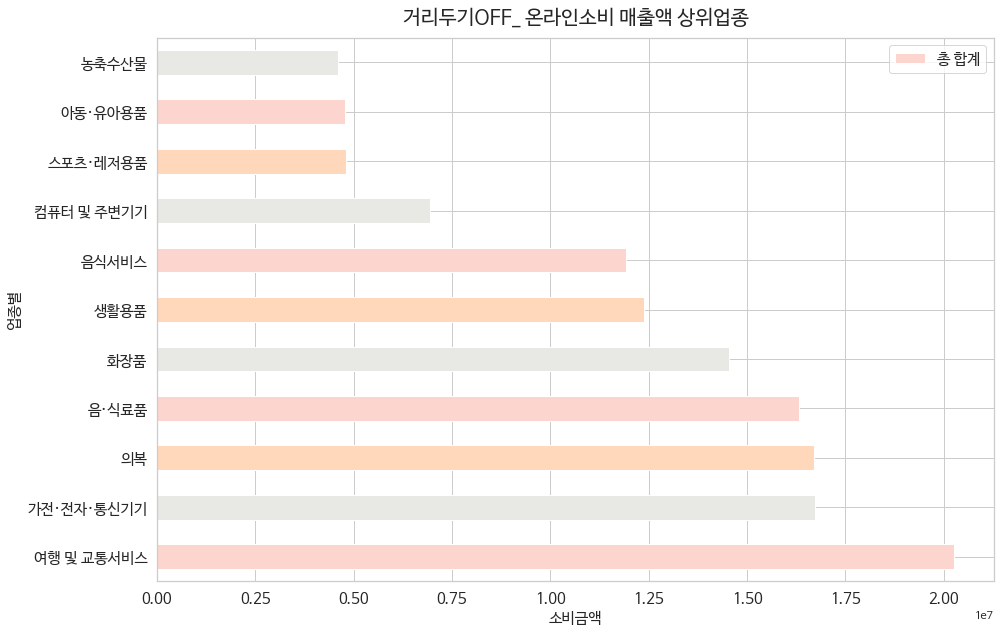

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
plt.rc('font', family='NanumBarunGothic')

df_off_sum_cate_10.plot.barh(x='업종명', y='총 합계', 
                         figsize=(15,10), fontsize=15, 
                         color=['#fcd5ce', '#e8e8e4', '#ffd7ba'])


plt.xlabel('소비금액',  fontsize=15)
plt.ylabel('업종별', fontsize=15)
plt.title('거리두기OFF_온라인소비 매출액 상위업종', fontsize=20, pad=15)
plt.legend(["총 합계"], prop={'size':15})
plt.show()



# 거리두기ON _ 소비업종 상위 10개 확인

In [ ]:
on_df.head()

,월별,합계,컴퓨터 및 주변기기,가전·전자·통신기기,서적,사무·문구,의복,신발,가방,패션용품 및 액세서리,...,생활용품,자동차 및 자동차용품,가구,애완용품,여행 및 교통서비스,문화 및 레저서비스,e쿠폰서비스,음식서비스,기타서비스,기타
16,20-03,12395207.0,677703.0,1401448.0,261298.0,88777.0,1163579.0,202992.0,218312.0,182878.0,...,1239912.0,211539.0,433960.0,89927.0,336480.0,24483.0,354055.0,1252462.0,70484.0,320078.0
17,20-04,11865005.0,632656.0,1333909.0,204847.0,81374.0,1155879.0,209318.0,197855.0,167749.0,...,1083795.0,133384.0,401941.0,89355.0,435031.0,31345.0,339841.0,1263148.0,120736.0,248943.0
18,20-05,12512199.0,579558.0,1548002.0,169464.0,81854.0,1322705.0,247007.0,223745.0,189517.0,...,1151792.0,143319.0,397538.0,89750.0,553641.0,54981.0,345582.0,1320798.0,95438.0,321848.0
19,20-06,12423338.0,521536.0,1518819.0,170175.0,80278.0,1302365.0,244096.0,238258.0,186921.0,...,1166157.0,260840.0,394872.0,87477.0,593576.0,48133.0,315187.0,1253440.0,99843.0,291553.0
20,20-07,12766131.0,594361.0,1393142.0,186432.0,82692.0,1092426.0,219823.0,239820.0,200200.0,...,1211740.0,158251.0,381140.0,95766.0,793270.0,80139.0,348389.0,1378600.0,109815.0,315220.0


In [ ]:
# 반복문 활용하여 업종별 합계 구하기

on_cate_data = []
on_sum_data = []

for i in on_df.iloc[:, 2:]:
  on_cate_data.append(i)
  on_sum_data.append(on_df[i].sum())

on_sum_data

[16062734.0,
 41112765.0,
 5099615.0,
 2247520.0,
 32003542.0,
 5534425.0,
 6061102.0,
 4677808.0,
 11337556.0,
 24169330.0,
 9801889.0,
 45454024.0,
 13471467.0,
 30883807.0,
 5762894.0,
 10544325.0,
 2446731.0,
 16957167.0,
 2019823.0,
 10856172.0,
 45446318.0,
 3536529.0,
 6938094.0]

In [ ]:
df_on_sum_cate = pd.DataFrame(
    {
     '업종명':on_cate_data,
     '총 합계':on_sum_data
     }
)

df_on_sum_cate.head()

,업종명,총 합계
0,컴퓨터 및 주변기기,16062734.0
1,가전·전자·통신기기,41112765.0
2,서적,5099615.0
3,사무·문구,2247520.0
4,의복,32003542.0


In [ ]:
# 상위업종 10개 추출

df_on_sum_cate.sort_values(by='총 합계', ascending=False, inplace=True)
df_on_sum_cate_10 = df_on_sum_cate.iloc[:11]
df_on_sum_cate_10

,업종명,총 합계
11,음·식료품,45454024.0
20,음식서비스,45446318.0
1,가전·전자·통신기기,41112765.0
4,의복,32003542.0
13,생활용품,30883807.0
9,화장품,24169330.0
17,여행 및 교통서비스,16957167.0
0,컴퓨터 및 주변기기,16062734.0
12,농축수산물,13471467.0
8,스포츠·레저용품,11337556.0


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8 missing from current font.
  font.set_text(s, 0, flags=flags)


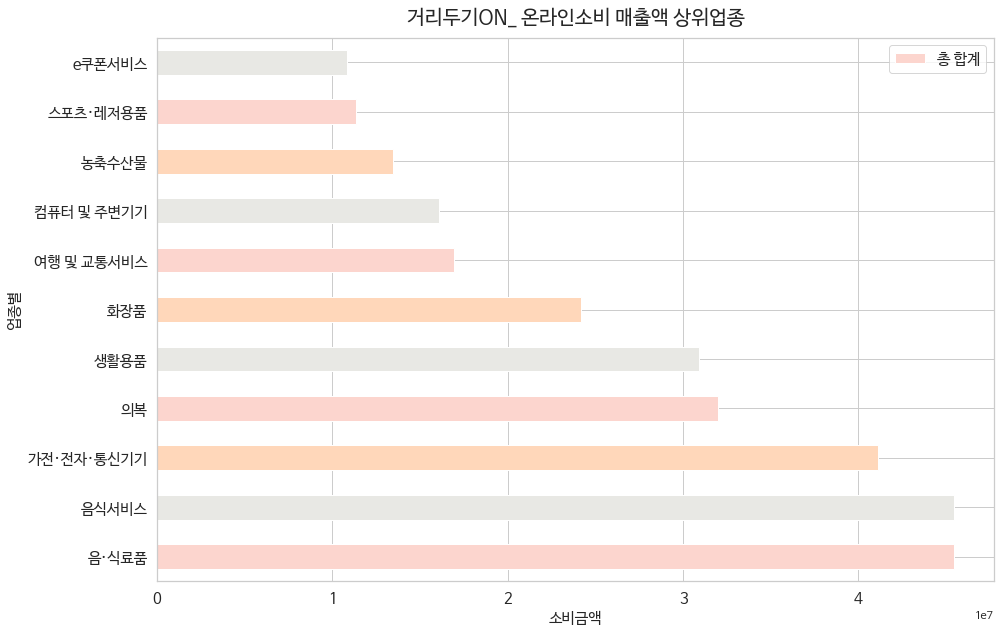

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
plt.rc('font', family='NanumBarunGothic')

df_on_sum_cate_10.plot.barh(x='업종명', y='총 합계', 
                         figsize=(15,10), fontsize=15, 
                         color=['#fcd5ce', '#e8e8e4', '#ffd7ba'])


plt.xlabel('소비금액',  fontsize=15)
plt.ylabel('업종별', fontsize=15)
plt.title('거리두기ON_온라인소비 매출액 상위업종', fontsize=20, pad=15)
plt.legend(["총 합계"], prop={'size':15})
plt.show()



# 음/식료품과 음식서비스 증감율 확인하기

In [ ]:
# 음/식료품과 음식서비스 총 합계 구하기

df3 = pd.DataFrame({
    '월별':on_df['월별'],
    '음/식료품' : on_df['음·식료품'],
    '음식서비스' : on_df['음식서비스']
})

df3['총 합계'] = df3.iloc[:].sum(axis=1)
df3.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  import sys


,월별,음/식료품,음식서비스,총 합계
16,20-03,1627809.0,1252462.0,2880271.0
17,20-04,1509770.0,1263148.0,2772918.0
18,20-05,1462526.0,1320798.0,2783324.0
19,20-06,1424733.0,1253440.0,2678173.0
20,20-07,1569245.0,1378600.0,2947845.0


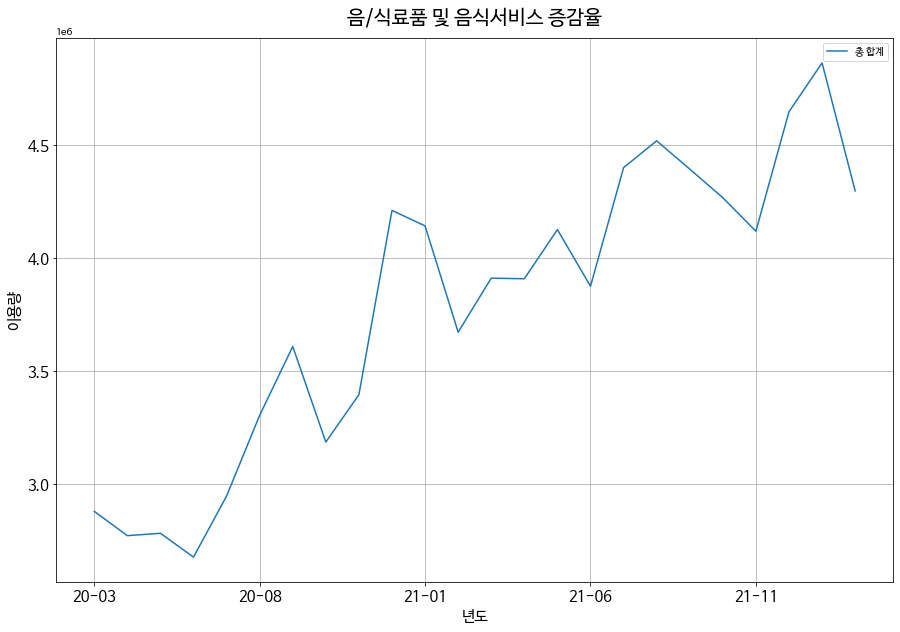

In [ ]:
# 음/식료품과 음식서비스 총 합계 구하기

df3.plot(x='월별', y='총 합계', figsize=(15,10), fontsize=15 )
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
plt.rc('font', family='NanumBarunGothic')
plt.grid()
#plt.ylim(1000000, 50000000)
plt.title("음/식료품 및 음식서비스 증감율", fontsize=20, pad=15)
plt.xlabel("년도", fontsize=15)
plt.ylabel("이용량", fontsize=15)
plt.show()


In [ ]:
month = df3['월별']
month = list(month)
month

['20-03',
 '20-04',
 '20-05',
 '20-06',
 '20-07',
 '20-08',
 '20-09',
 '20-10',
 '20-11',
 '20-12',
 '21-01',
 '21-02',
 '21-03',
 '21-04',
 '21-05',
 '21-06',
 '21-07',
 '21-08',
 '21-09',
 '21-10',
 '21-11',
 '21-12',
 '22-01',
 '22-02']

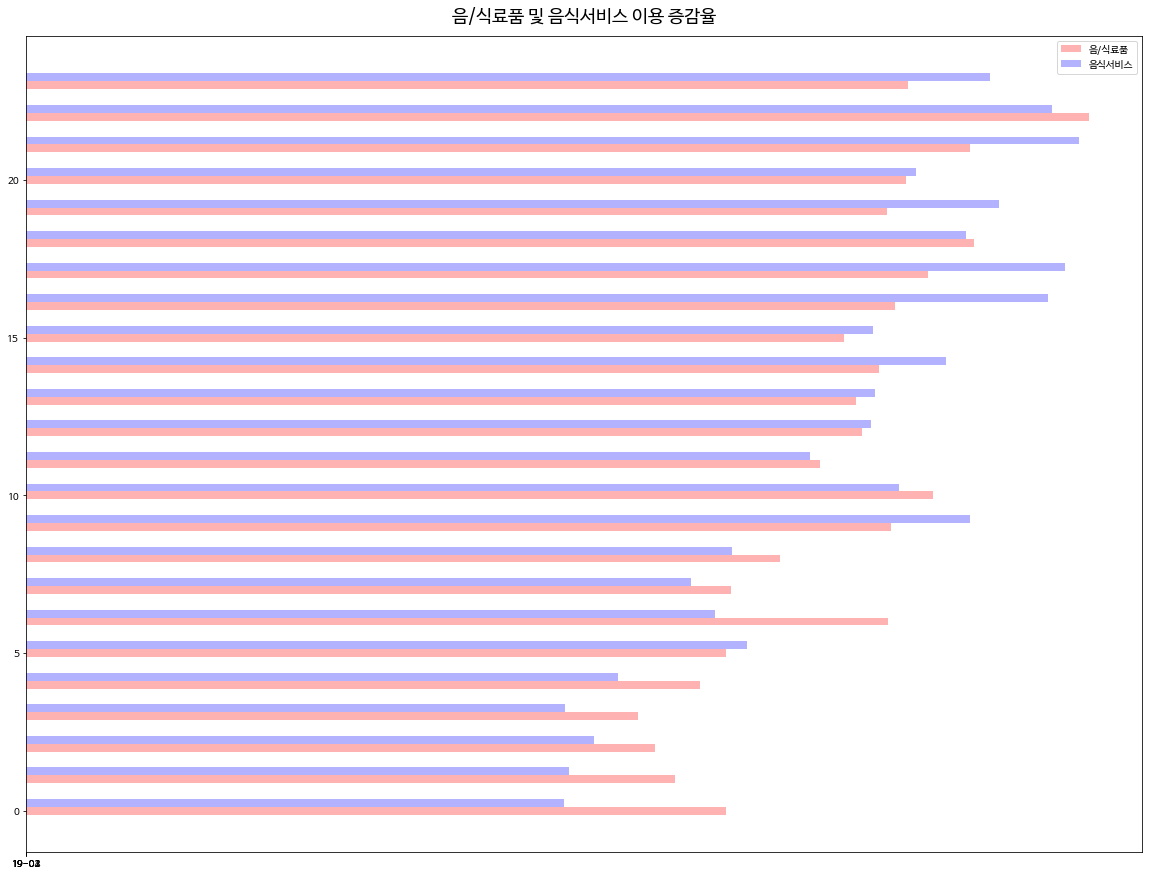

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(figsize=(20,15))
bar_width = 0.25

index = np.arange(24)

b1 = plt.barh(index, df3['음/식료품'], bar_width, alpha=0.3, color='red', label='음/식료품')
b2 = plt.barh(index + bar_width, df3['음식서비스'], bar_width, alpha=0.3, color='blue', label='음식서비스')

# x축 위치를 정 가운데로 조정하고 x축의 텍스트를 year 정보와 매칭
plt.xticks(np.arange(bar_width, 4 + bar_width, 1), df['월별'])

# x축, y축 이름 및 범례 설정
plt.title('음/식료품 및 음식서비스 이용 증감율', fontsize=18, pad=15)
#plt.xlabel('year', size = 15)
#plt.ylabel('revenue', size = 15)
plt.legend()
plt.show()


In [ ]:
df3

df3_melt = pd.melt(
    df3,
    id_vars=["월별"],
    value_vars=['음/식료품', '음식서비스']

)
df3_melt

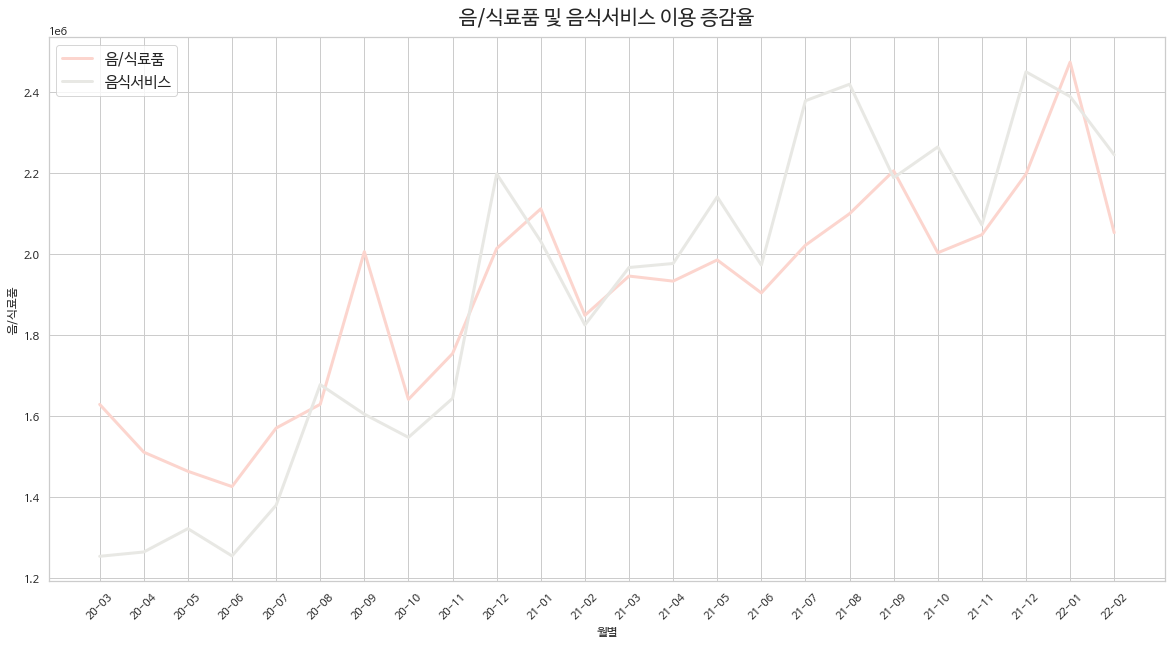

In [ ]:
#sns.set_theme( style="whitegrid", palette="pastel" )
from scipy.interpolate import make_interp_spline
plt.rc('font', family='NanumBarunGothic')
plt.xticks(rotation=45)


#fcd5ce', '#e8e8e4', '#ffd7ba
sns.lineplot(x='월별', y='음/식료품', data=df3, color="#fcd5ce",linewidth=3.0)
g = sns.lineplot(x='월별', y='음식서비스', data=df3, color="#e8e8e4",linewidth=3.0)
#g = sns.lineplot(x='월별', y='총 합계', data=df3, color="red")
g.figure.set_size_inches(20, 10)

#g.xaxis.set_major_locator(ticker.MultipleLocator(3))


g.set_title("음/식료품 및 음식서비스 이용 증감율", fontsize=20, pad=15)
#g.set_xlabel("년월", fontsize=15)
#g.set_ylabel("상대적 검색량", fontsize=15)
plt.legend(["음/식료품", "음식서비스"], prop={'size':15})


plt.show()